In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [99]:
ipl=pd.read_csv('datasets/deliveries.csv')

In [100]:
df=ipl.copy()
df

,Unnamed: 0,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        150460 non-null  int64 
 1   match_id          150460 non-null  int64 
 2   inning            150460 non-null  int64 
 3   batting_team      150460 non-null  object
 4   bowling_team      150460 non-null  object
 5   over              150460 non-null  int64 
 6   ball              150460 non-null  int64 
 7   batsman           150460 non-null  object
 8   non_striker       150460 non-null  object
 9   bowler            150460 non-null  object
 10  is_super_over     150460 non-null  int64 
 11  wide_runs         150460 non-null  int64 
 12  bye_runs          150460 non-null  int64 
 13  legbye_runs       150460 non-null  int64 
 14  noball_runs       150460 non-null  int64 
 15  penalty_runs      150460 non-null  int64 
 16  batsman_runs      150460 non-null  int

In [102]:
df.isnull().sum()

Unnamed: 0               0
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [104]:
df.is_super_over.unique()

array([0, 1], dtype=int64)

In [105]:
df.is_super_over.replace({0:'No',1:'Yes'},inplace=True)

In [106]:
df.is_super_over.value_counts()

No     150379
Yes        81
Name: is_super_over, dtype: int64

In [107]:
df.columns

Index(['Unnamed: 0', 'match_id', 'inning', 'batting_team', 'bowling_team',
       'over', 'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [108]:
df=df.drop(columns={'Unnamed: 0','match_id'})

In [109]:
df.duplicated().sum()

282

In [110]:
df[df.duplicated()]

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
6929,1,Royal Challengers Bangalore,Gujarat Lions,2,3,V Kohli,CH Gayle,Basil Thampi,No,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6930,1,Royal Challengers Bangalore,Gujarat Lions,2,4,V Kohli,CH Gayle,Basil Thampi,No,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6942,1,Royal Challengers Bangalore,Gujarat Lions,4,3,CH Gayle,V Kohli,Basil Thampi,No,0,0,0,0,0,1,0,1,NaN,NaN,NaN
7597,1,Rising Pune Supergiant,Royal Challengers Bangalore,1,1,AM Rahane,RA Tripathi,AF Milne,No,0,0,0,0,0,0,0,0,NaN,NaN,NaN
7646,1,Rising Pune Supergiant,Royal Challengers Bangalore,9,1,SPD Smith,RA Tripathi,P Negi,No,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149987,1,Gujarat Lions,Sunrisers Hyderabad,3,6,BB McCullum,SK Raina,B Kumar,No,0,0,0,0,0,0,0,0,NaN,NaN,NaN
150056,1,Gujarat Lions,Sunrisers Hyderabad,15,2,AJ Finch,RA Jadeja,BB Sran,No,0,0,0,0,0,1,0,1,NaN,NaN,NaN
150094,2,Sunrisers Hyderabad,Gujarat Lions,1,2,DA Warner,S Dhawan,P Kumar,No,0,0,0,0,0,0,0,0,NaN,NaN,NaN
150096,2,Sunrisers Hyderabad,Gujarat Lions,1,4,S Dhawan,DA Warner,P Kumar,No,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [111]:
df.drop_duplicates(keep='first',inplace=True)

In [112]:
df.duplicated().sum()

0

In [113]:
df.isnull().sum()

inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    142741
dismissal_kind      142741
fielder             144810
dtype: int64

# Top 10 Run Scorer

In [114]:
temp=df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
temp

batsman
SK Raina          4543
V Kohli           4420
RG Sharma         4204
G Gambhir         4126
DA Warner         4007
RV Uthappa        3765
CH Gayle          3636
MS Dhoni          3559
S Dhawan          3557
AB de Villiers    3484
Name: batsman_runs, dtype: int64

In [115]:
px.bar(temp,text_auto=True)

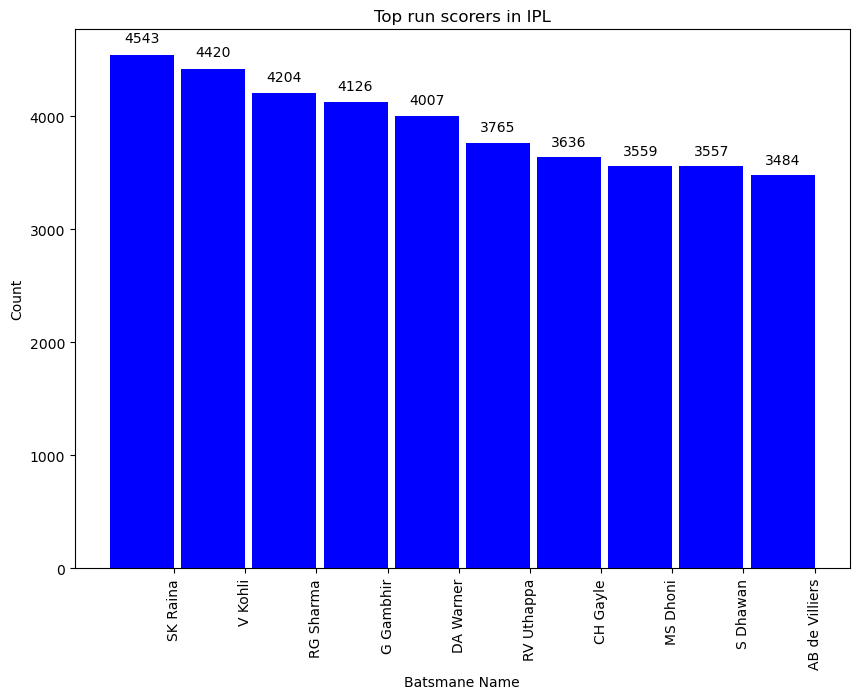

In [116]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')
labels = np.array(temp[:10].index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(ind, np.array(temp[:10]), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsmane Name')
autolabel(rects)
plt.show()

Suresh Raina(Chinna Thala) has scored most runs followed by Virat Kohli(King Kohli) and Rohit Sharma(Hitman).
David Warner(Tik-Tok Star) scored most runs being a foreign player.



In [117]:
df.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

Above we can see that 'Rising Pune Supergiant' and 'Rising Pune Supergiants' is the same team so we have to change it

In [118]:
df.batting_team=df.batting_team.replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [119]:
df.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [120]:
df.bowling_team.unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [121]:
df.bowling_team=df.bowling_team.replace('Rising Pune Supergiant','Rising Pune Supergiants')

In [122]:
df.bowling_team.unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors'],
      dtype=object)

In [123]:
df.dismissal_kind.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

# Top 10 Wicket-Takers

In [124]:
temp1=df.loc[df['dismissal_kind'].isin(['caught', 'bowled', 'lbw', 'caught and bowled',
       'stumped','hit wicket'])]
wickets=temp1.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10)
wickets

bowler
SL Malinga         154
A Mishra           134
Harbhajan Singh    127
PP Chawla          126
DJ Bravo           122
B Kumar            111
A Nehra            106
R Vinay Kumar      103
Z Khan             102
R Ashwin           100
Name: dismissal_kind, dtype: int64

<AxesSubplot:title={'center':'Most Wickets'}, xlabel='bowler'>

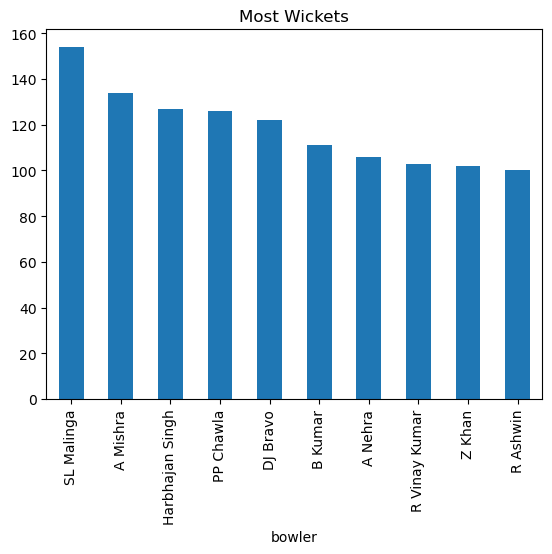

In [125]:
wickets.plot(kind='bar',title='Most Wickets')

Lasith Malinga(Yorker King) took most wickets followed by Amit Mishra(Mishra Ji) and Harbhajan Singh(Bhajji). Dwane Bravo(Champion) took most wickets among Foreign players.

# Most stumping by keeper

In [126]:
temp2=df[df['dismissal_kind']=='stumped']
stumping=temp2.groupby('fielder')['dismissal_kind'].count().sort_values(ascending=False).head(10)
stumping

fielder
RV Uthappa        32
MS Dhoni          30
KD Karthik        26
WP Saha           17
AC Gilchrist      16
PA Patel          14
NV Ojha           10
KC Sangakkara      9
AB de Villiers     7
SP Goswami         7
Name: dismissal_kind, dtype: int64

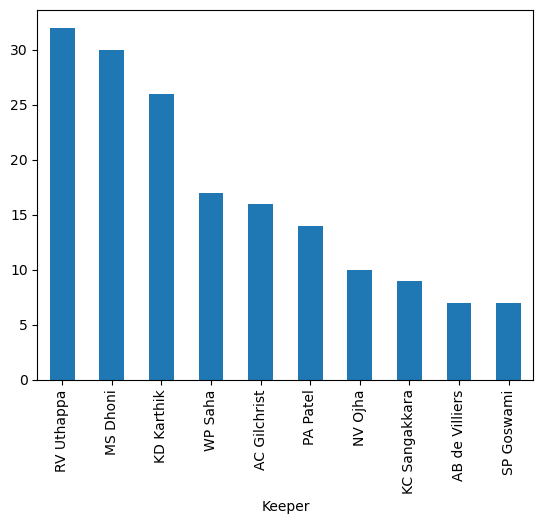

In [127]:
stumping.plot(kind='bar')
plt.xlabel('Keeper')
autolabel(rects)
plt.show()

Robin Uthappa() dissmissed most batsman as a wicketkeeper followed by MS Dhoni(Thala) and Dinesh Karthik(DK)

# Most Sixes by a batsman

let us see the players with more number of 6s in IPL.

In [128]:
six=df[df['batsman_runs']==6]
sixes=six.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10)
sixes

batsman
CH Gayle          264
SK Raina          174
RG Sharma         173
V Kohli           160
DA Warner         160
AB de Villiers    158
MS Dhoni          156
YK Pathan         148
KA Pollard        147
Yuvraj Singh      141
Name: batsman_runs, dtype: int64

<AxesSubplot:title={'center':'Most sixes by a Batsman'}, xlabel='batsman'>

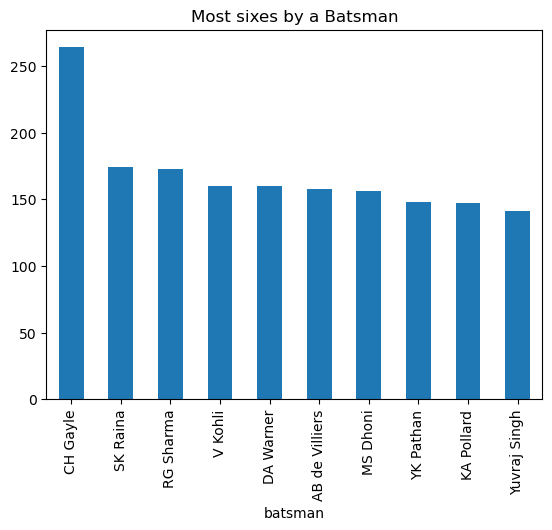

In [129]:
sixes.plot(kind='bar',title='Most sixes by a Batsman')

Chris Gayle living up to his name Universal Boss  with 264 sixes and 90 sixes greater than Suresh Raina(Chinna Thala) with 174 sixes . Hitman is the 3rd in the list with 173 sixes

# Most Number of Fours

let us see the players with more number of 4s in IPL.

In [130]:
four=df[df['batsman_runs']==4]
fours=four.groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(10)
fours

batsman
G Gambhir     484
SK Raina      402
S Dhawan      401
DA Warner     400
V Kohli       384
RV Uthappa    376
RG Sharma     354
V Sehwag      334
AM Rahane     320
CH Gayle      297
Name: batsman_runs, dtype: int64

<AxesSubplot:title={'center':'Most Fours by a Batsman'}, xlabel='batsman'>

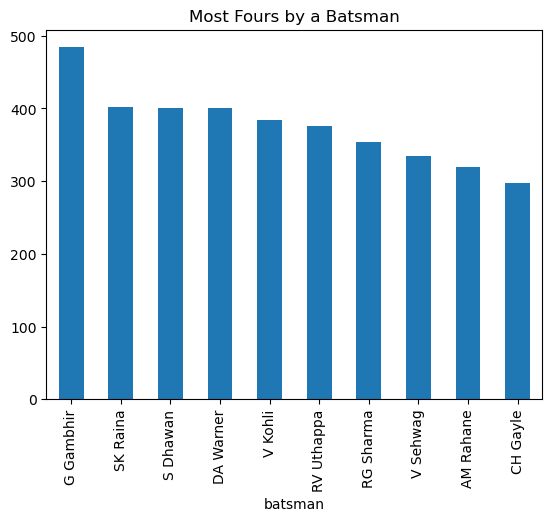

In [131]:
fours.plot(kind='bar',title='Most Fours by a Batsman')

Goutam Gambhir(Gouti,Kohli`s Bestfriend) hit most fours followed by Chinna Thala And Gabbar(SHikhar Dhawan)

# Most DOT balls 

Now let us see the Bowler who has delivered the most number of dot balls.

In [132]:
dot=df[df['total_runs']==0]
dots=dot.groupby('bowler')['total_runs'].count().sort_values(ascending=False).head(10)
dots

bowler
P Kumar            1063
Harbhajan Singh    1059
SL Malinga         1048
DW Steyn            968
A Mishra            953
PP Chawla           909
R Ashwin            890
Z Khan              867
IK Pathan           832
B Kumar             821
Name: total_runs, dtype: int64

<AxesSubplot:title={'center':'Most DOT balls delivered by a baller'}, xlabel='bowler'>

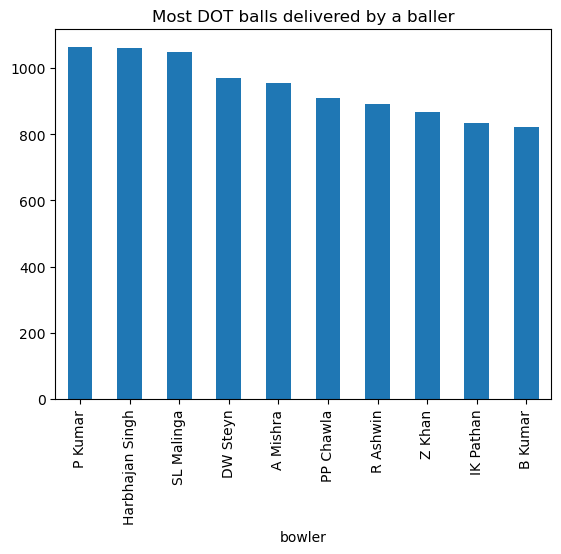

In [133]:
dots.plot(kind='bar',title='Most DOT balls delivered by a baller')

Pravin Kumar tops the chart with 1063 dot deliveries.followed by  Bhajji And Yorker King

# Most dot deliveries faced by batsman
Now let us see the batsman who has played the most number of dot balls.



In [134]:
dots1=dot.groupby('batsman')['total_runs'].count().sort_values(ascending=False).head(10)
dots1

batsman
V Kohli       1159
G Gambhir     1118
RG Sharma     1085
S Dhawan      1067
SK Raina      1000
RV Uthappa     997
CH Gayle       982
DA Warner      963
AM Rahane      893
JH Kallis      870
Name: total_runs, dtype: int64

<AxesSubplot:title={'center':'Most dot deliveries faced by batsman'}, xlabel='batsman'>

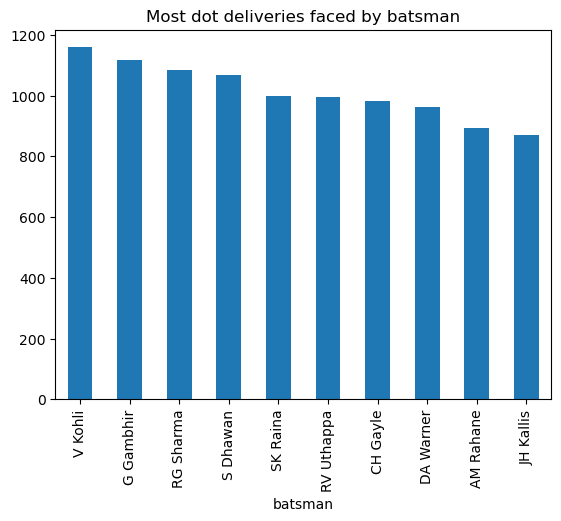

In [135]:
dots1.plot(kind='bar',title='Most dot deliveries faced by batsman')

In [136]:
px.bar(dots1,text_auto=True)

King Kohli hit most dot balls followed by Gouti and Hitman

# runs conceded by a bowler

In [137]:
run=df[df['legbye_runs']==0]
runs=run.groupby('bowler')['total_runs'].sum().sort_values(ascending=False).head(20)
runs1=run.groupby('bowler')['total_runs'].sum().sort_values(ascending=True).head(20)
runs,runs1

(bowler
 Harbhajan Singh    3397
 A Mishra           3267
 PP Chawla          3265
 P Kumar            3252
 SL Malinga         2948
 R Vinay Kumar      2926
 Z Khan             2790
 DJ Bravo           2747
 UT Yadav           2733
 IK Pathan          2668
 RA Jadeja          2512
 R Ashwin           2504
 A Nehra            2492
 SR Watson          2440
 JA Morkel          2362
 PP Ojha            2349
 RP Singh           2343
 B Kumar            2341
 DW Steyn           2326
 JH Kallis          2300
 Name: total_runs, dtype: int64,
 bowler
 AC Gilchrist         0
 N Rana               3
 AM Rahane            5
 SPD Smith            5
 LA Carseldine        6
 SS Mundhe            6
 KS Williamson        7
 Y Gnaneswara Rao     7
 Sachin Baby          8
 RS Gavaskar          8
 SA Yadav             8
 RA Shaikh           11
 BJ Rohrer           12
 RA Tripathi         12
 C Ganapathy         13
 NB Singh            15
 C Munro             15
 F du Plessis        16
 P Prasanth        

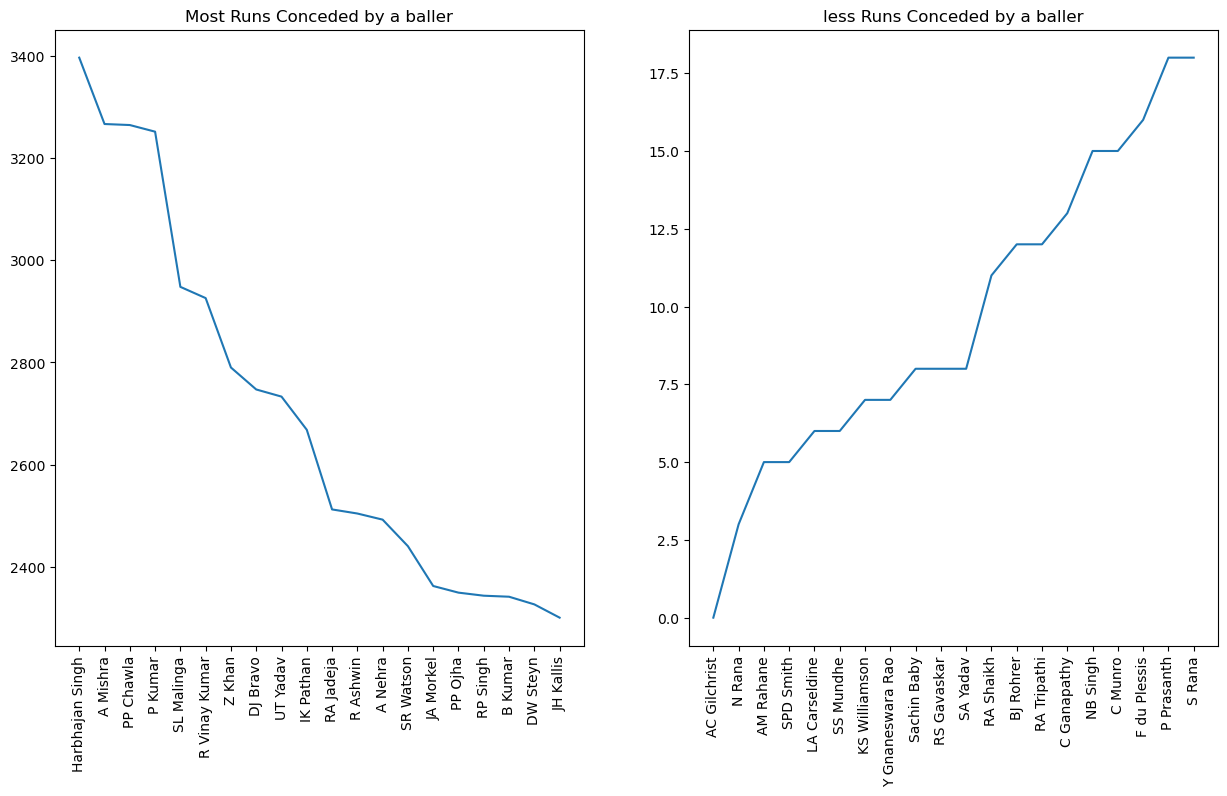

In [138]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(runs)
plt.title('Most Runs Conceded by a baller')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.plot(runs1)
plt.title('less Runs Conceded by a baller')
plt.xticks(rotation=90)
plt.show()

# Bowler Analysis
Now let us see the bowlers who has bowled most number of balls in IPL.



In [139]:
balls=df.groupby('bowler')['ball'].count().sort_values(ascending=False).head(10)
balls

bowler
Harbhajan Singh    2985
A Mishra           2703
SL Malinga         2679
P Kumar            2621
PP Chawla          2586
R Ashwin           2354
Z Khan             2264
R Vinay Kumar      2157
DW Steyn           2148
IK Pathan          2108
Name: ball, dtype: int64

In [140]:
px.bar(balls,title='bowlers who has bowled most number of balls in IPL ',text_auto=True)

Harbhajan Singh is the the bowler with most number of balls bowled in IPL matches.

# Bowlers Economy
Let us see the Bowlers with low economies

In [141]:
# lets find the total runs conceded by a bowler
run=df[df['legbye_runs']==0]
t_runs=run.groupby('bowler')['total_runs'].sum().sort_values(ascending=False)
#now let us find the total balls bowled by a bowler
t_balls=df.groupby('bowler')['ball'].count().sort_values(ascending=False)
# Total overs bowled by a bowler
overs=t_balls/6
#Economy of the bowler
economy=t_runs/overs

In [142]:
economy1=economy.sort_values().head(10)
economy2=economy.sort_values().tail(10)

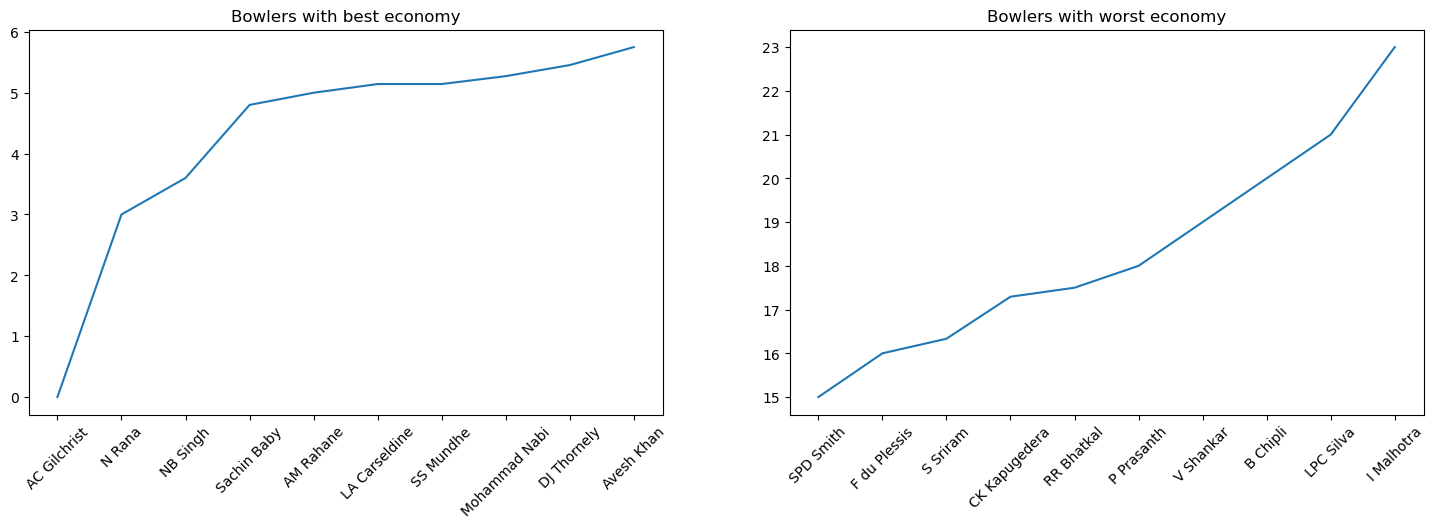

In [143]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(economy1)
plt.title('Bowlers with best economy')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.plot(economy2)
plt.title('Bowlers with worst economy')
plt.xticks(rotation=45)
plt.show()

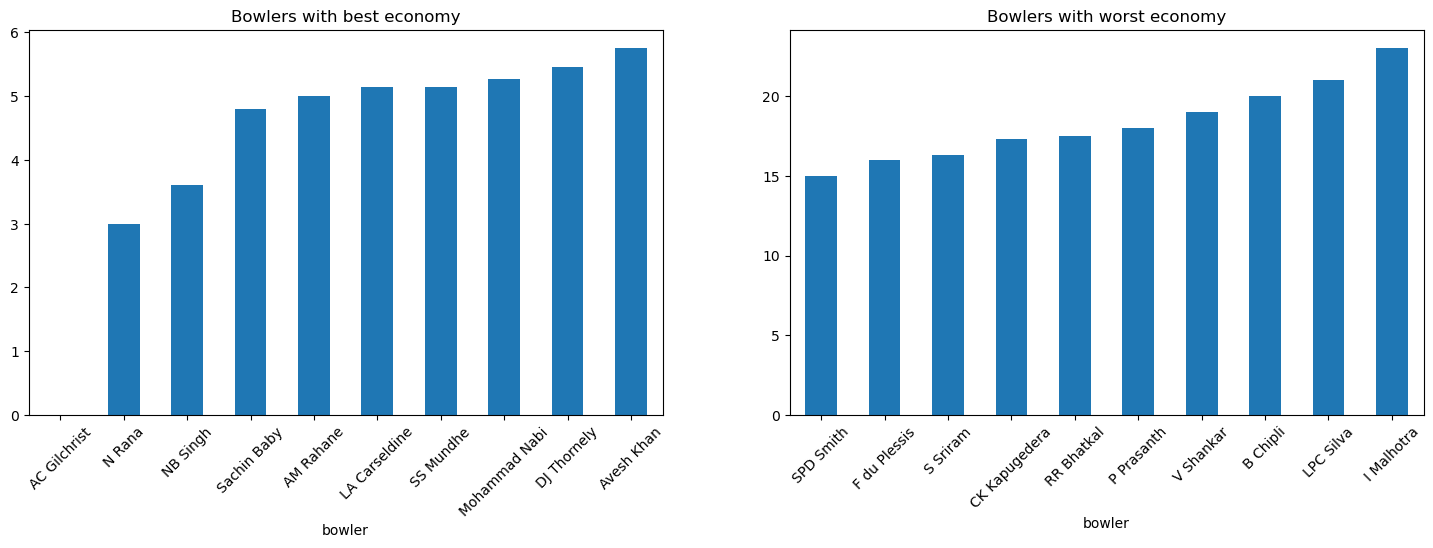

In [144]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
economy1.plot(kind='bar')
plt.title('Bowlers with best economy')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
economy2.plot(kind='bar')
plt.title('Bowlers with worst economy')
plt.xticks(rotation=45)
plt.show()

from above plots we can conclude that Adam Gilchrist is the best bowler as his economy is 0 followed by Nitish Rana and
Ishan Malhotra is the worst bowler as his economy rate is 23 and LPC silva with economy of 21

# Extra runs by which bowler¶
Let us see the bowlers who has bowled more number of extras in IPL.



In [145]:
extras=df.groupby('bowler')['extra_runs'].sum().sort_values(ascending=False)
extras

bowler
SL Malinga       268
P Kumar          235
UT Yadav         186
RP Singh         181
Z Khan           169
                ... 
CK Kapugedera      0
A Nel              0
Sachin Baby        0
CJ McKay           0
RW Price           0
Name: extra_runs, Length: 356, dtype: int64

In [146]:
px.bar(extras.head(10),text_auto=True)

Lasith Malinga have given most number of extras followed by pravin Kumar

# Extra deliveries


<AxesSubplot:title={'center':'Extras diliverd by bowlers'}, ylabel='None'>

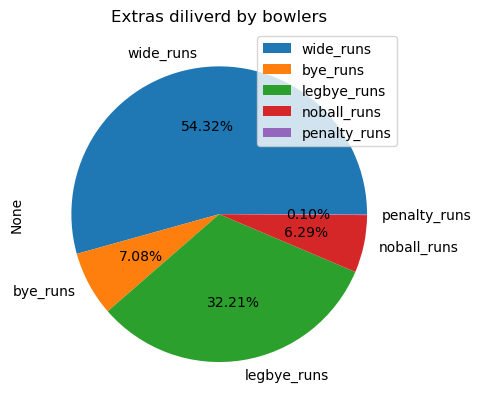

In [147]:
t_extras=df[['wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs']].sum()
t_extras.plot(kind='pie',title='Extras diliverd by bowlers',legend=True,autopct='%0.2f%%')

most of the bowlers have bowled wide balls with 54% , 
  bye_runs        (735),  
    legbye_runs     (3345),
      noball_runs      (653),
       penalty_runs      (10)

# Dismisal type.


In [148]:
px.bar(ipl['dismissal_kind'].value_counts(),text_auto=True)

Most common dismissal type is caught. If you see the graph's last portion there is a few time dismissal with hit wicket(9) and obstructing the field(1).

In [149]:
df[df['dismissal_kind']=='obstructing the field']

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
105613,2,Kolkata Knight Riders,Pune Warriors,18,5,YK Pathan,DB Das,WD Parnell,No,0,0,0,0,0,0,0,0,YK Pathan,obstructing the field,NaN


# Matches Dataset

In [150]:
matches=pd.read_csv('datasets/matches.csv')
matches

,Unnamed: 0,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [151]:
df1=matches.copy()

In [152]:
df1.shape

(636, 19)

In [153]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       636 non-null    int64  
 1   id               636 non-null    int64  
 2   season           636 non-null    int64  
 3   city             629 non-null    object 
 4   date             636 non-null    object 
 5   team1            636 non-null    object 
 6   team2            636 non-null    object 
 7   toss_winner      636 non-null    object 
 8   toss_decision    636 non-null    object 
 9   result           636 non-null    object 
 10  dl_applied       636 non-null    int64  
 11  winner           633 non-null    object 
 12  win_by_runs      636 non-null    int64  
 13  win_by_wickets   636 non-null    int64  
 14  player_of_match  633 non-null    object 
 15  venue            636 non-null    object 
 16  umpire1          635 non-null    object 
 17  umpire2         

In [154]:
df1.columns

Index(['Unnamed: 0', 'id', 'season', 'city', 'date', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner',
       'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1',
       'umpire2', 'umpire3'],
      dtype='object')

In [155]:
df1.drop(columns={'Unnamed: 0','umpire3','id'},inplace=True)

In [156]:
df1.isnull().sum()

season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

In [157]:
df1.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan],
      dtype=object)

In [158]:
df1.city.fillna('other',inplace=True)

In [159]:
df1.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants'],
      dtype=object)

In [160]:
df1[~(df1['winner'].isin(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants']))]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


In [161]:
df1.winner.fillna('No result',inplace=True)

In [162]:
df1.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

In [163]:
df1.player_of_match.fillna('Not Decided',inplace=True)

In [164]:
df1.umpire1.unique()

array(['AY Dandekar', 'A Nand Kishore', 'Nitin Menon', 'AK Chaudhary',
       nan, 'A Deshmukh', 'KN Ananthapadmanabhan', 'YC Barde', 'S Ravi',
       'CB Gaffaney', 'M Erasmus', 'NJ Llong', 'CK Nandan', 'Asad Rauf',
       'MR Benson', 'Aleem Dar', 'SJ Davis', 'BF Bowden', 'IL Howell',
       'DJ Harper', 'RE Koertzen', 'BR Doctrove', 'AV Jayaprakash',
       'BG Jerling', 'HDPK Dharmasena', 'S Asnani', 'GAV Baxter',
       'SS Hazare', 'K Hariharan', 'SL Shastri', 'SK Tarapore',
       'SJA Taufel', 'S Das', 'AM Saheba', 'PR Reiffel', 'JD Cloete',
       'VA Kulkarni', 'BNJ Oxenford', 'C Shamshuddin', 'RK Illingworth',
       'RM Deshpande', 'K Srinath', 'SD Fry', 'PG Pathak', 'K Bharatan'],
      dtype=object)

In [165]:
df1[~(df1['umpire1'].isin(['AY Dandekar', 'A Nand Kishore', 'Nitin Menon', 'AK Chaudhary',
     'A Deshmukh', 'KN Ananthapadmanabhan', 'YC Barde', 'S Ravi',
       'CB Gaffaney', 'M Erasmus', 'NJ Llong', 'CK Nandan', 'Asad Rauf',
       'MR Benson', 'Aleem Dar', 'SJ Davis', 'BF Bowden', 'IL Howell',
       'DJ Harper', 'RE Koertzen', 'BR Doctrove', 'AV Jayaprakash',
       'BG Jerling', 'HDPK Dharmasena', 'S Asnani', 'GAV Baxter',
       'SS Hazare', 'K Hariharan', 'SL Shastri', 'SK Tarapore',
       'SJA Taufel', 'S Das', 'AM Saheba', 'PR Reiffel', 'JD Cloete',
       'VA Kulkarni', 'BNJ Oxenford', 'C Shamshuddin', 'RK Illingworth',
       'RM Deshpande', 'K Srinath', 'SD Fry', 'PG Pathak', 'K Bharatan']))]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [67]:
df1[['umpire1','umpire2']]=df1[['umpire1','umpire2']].fillna('Unknown')

In [68]:
df1.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [69]:
df1.duplicated().sum()

0

In [70]:
df1.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Unknown,Unknown


In [71]:
df1.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)

# Top 10 cities matches played in

In [72]:
city=df1.city.value_counts().head(10)
city

Mumbai        85
Bangalore     66
Kolkata       61
Delhi         60
Hyderabad     49
Chennai       48
Chandigarh    46
Jaipur        33
Pune          32
Durban        15
Name: city, dtype: int64

<AxesSubplot:>

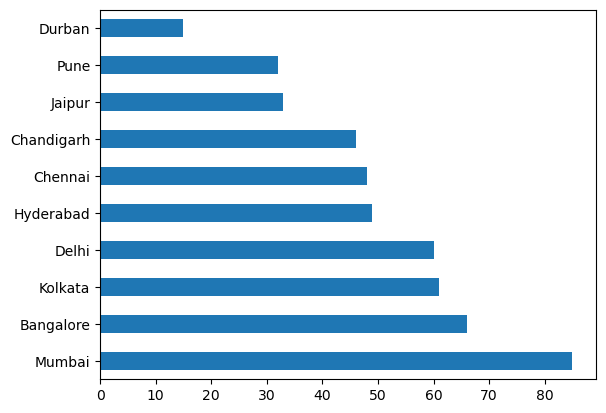

In [73]:
city.plot(kind='barh')

Most of the matches are played in the city of dreams Mumbai, followed by Bangalore and Kolkata

<AxesSubplot:xlabel='season', ylabel='count'>

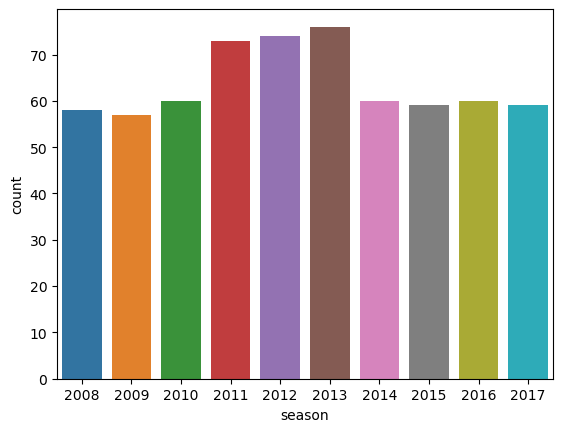

In [74]:
sns.countplot(x='season',data=df1)

More number of matches are played in year 2013 followed by 2012 and 2011 and all are above 70

# Team with most wins

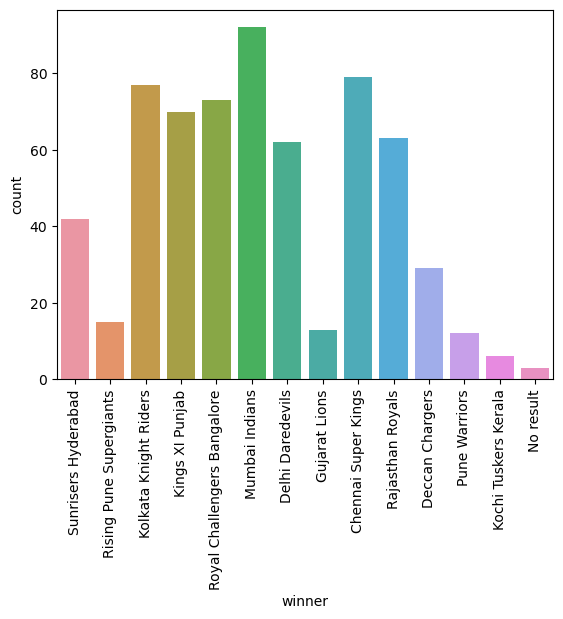

In [75]:
sns.countplot(x='winner',data=df1,orient="h")
plt.xticks(rotation=90)
plt.show()

In [76]:
df1.winner.value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Rising Pune Supergiants        15
Gujarat Lions                  13
Pune Warriors                  12
Kochi Tuskers Kerala            6
No result                       3
Name: winner, dtype: int64

The EL-CLASSICO are at the top of the charts with MI winning 92 matches and CSK winning  79 matches.

# Stadium wise matches

<AxesSubplot:>

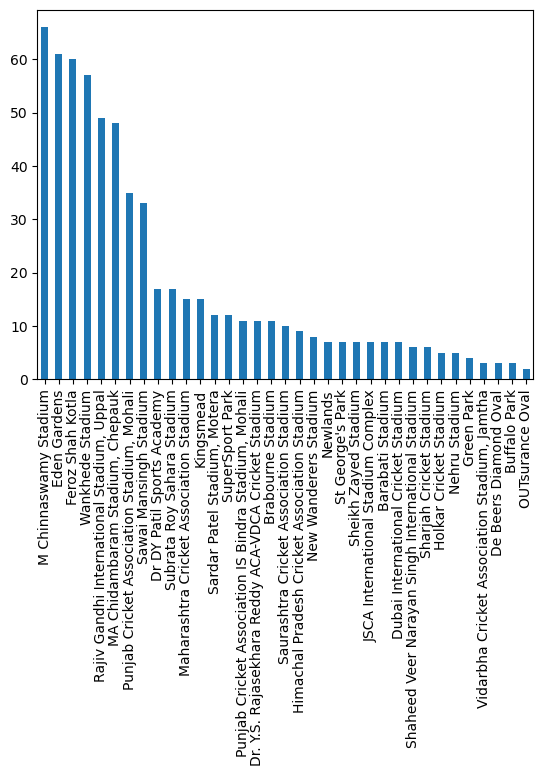

In [77]:
df1.venue.value_counts().plot(kind='bar')

From above plot we can conclude that most of the matches are played in 'M Chinnaswamy stadium' followed by 'Eden Gardens' and 'Feroz Shah Kotla'


But we cannot say that more number of matches are played in Banglore because Mumbai has 2 cricket stadiums in above graph, So Mumbai has most no of matches are played.

# Toss Decisions

<AxesSubplot:ylabel='toss_decision'>

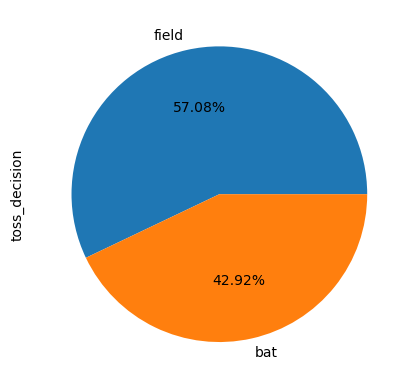

In [78]:
df1.toss_decision.value_counts().plot(kind='pie',autopct='%0.2f%%')

Most of the Captains chose Field instead of Batting first.

# Toss Decisions made by each team

In [79]:
df1.groupby('toss_winner')['toss_decision'].value_counts()

toss_winner                  toss_decision
Chennai Super Kings          bat              44
                             field            22
Deccan Chargers              bat              24
                             field            19
Delhi Daredevils             field            46
                             bat              26
Gujarat Lions                field            14
                             bat               1
Kings XI Punjab              field            43
                             bat              25
Kochi Tuskers Kerala         field             5
                             bat               3
Kolkata Knight Riders        field            48
                             bat              30
Mumbai Indians               field            45
                             bat              40
Pune Warriors                bat              11
                             field             9
Rajasthan Royals             field            35
                          

<AxesSubplot:xlabel='toss_winner'>

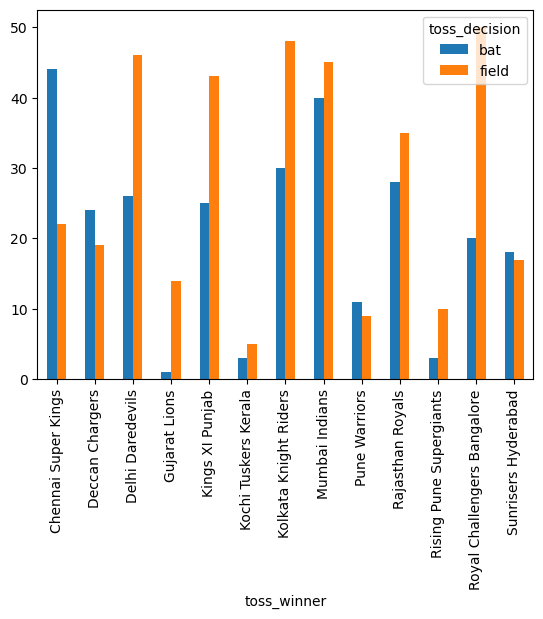

In [80]:
df1.groupby('toss_winner')['toss_decision'].value_counts().unstack().plot(kind='bar')

# Season wise Toss Decision

<AxesSubplot:xlabel='season', ylabel='count'>

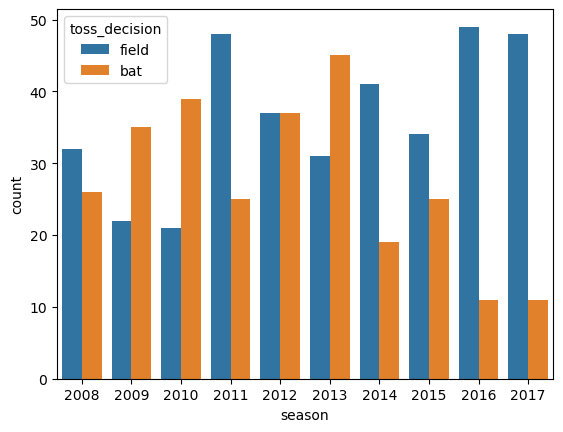

In [81]:
sns.countplot(x='season',hue='toss_decision',data=df1)

In [82]:
a=df1.loc[(df1['toss_decision']=='field')]
a.loc[a['toss_winner']==a['winner'],'Win']='Win'
a.loc[a['toss_winner']!=a['winner'],'Win']='Lose'

C:\Users\Mayur\AppData\Local\Temp\ipykernel_15104\2379392649.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:title={'center':'Win And lose percentage when captain chose to Field first'}, ylabel='Win'>

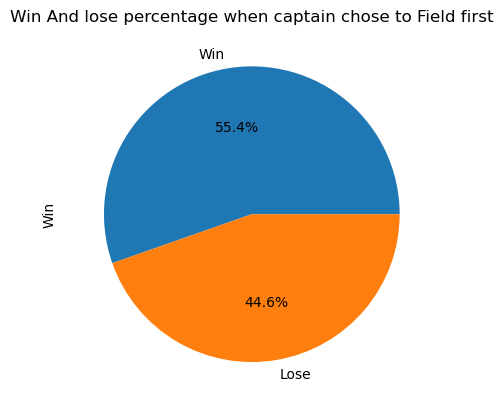

In [83]:
a['Win'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='Win And lose percentage when captain chose to Field first')


# Umpire 1 Priority

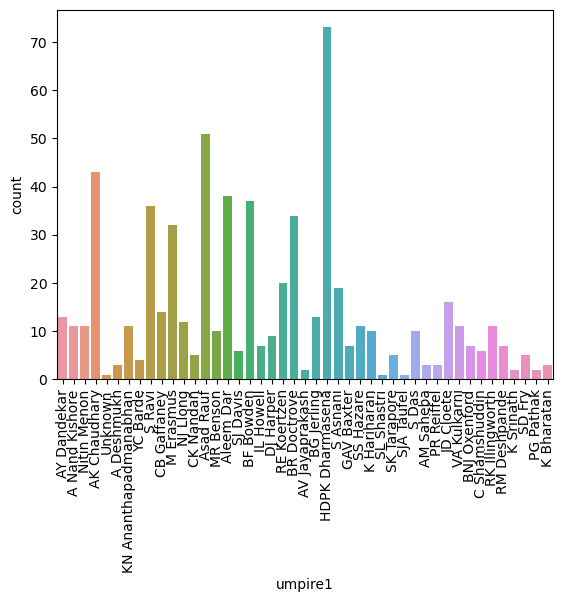

In [84]:
sns.countplot(data=df1,x='umpire1')
plt.xticks(rotation=90)
plt.show()

As you can see 'HDPK Dharmasena' has highest priority followed by 'Asad Rauf'

# Umpire 2 priority

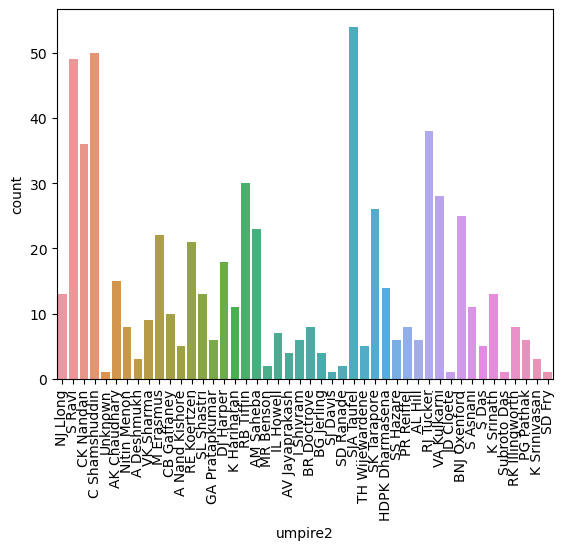

In [85]:
sns.countplot(data=df1,x='umpire2')
plt.xticks(rotation=90)
plt.show()

'SJA Taufel' has highest priority for umpire 2 followed by 'C Shamshuddin' and 'S Ravi'.

# Matches Won By Teams At Each Venue

In [86]:
fig=px.histogram(df1,x='winner',color='venue')
fig.update_xaxes(tickangle=90)

# Player of the match

<AxesSubplot:>

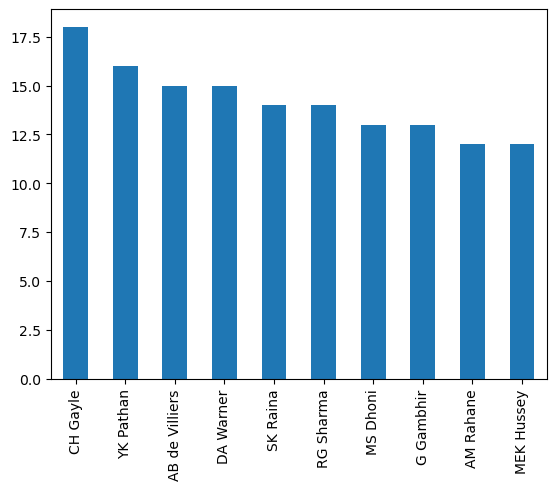

In [87]:
df1.player_of_match.value_counts().head(10).plot(kind='bar')

As you can see Universal Boss(Chris Gayle) has won player of the match award most of the times

In [170]:
df[df['is_super_over']=='Yes']

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
8092,3,Mumbai Indians,Gujarat Lions,1,1,JC Buttler,KA Pollard,JP Faulkner,Yes,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8093,3,Mumbai Indians,Gujarat Lions,1,2,KA Pollard,JC Buttler,JP Faulkner,Yes,0,0,0,0,0,4,0,4,NaN,NaN,NaN
8094,3,Mumbai Indians,Gujarat Lions,1,3,KA Pollard,JC Buttler,JP Faulkner,Yes,0,0,0,0,0,6,0,6,NaN,NaN,NaN
8095,3,Mumbai Indians,Gujarat Lions,1,4,KA Pollard,JC Buttler,JP Faulkner,Yes,0,0,0,0,0,0,0,0,KA Pollard,caught,AJ Finch
8096,3,Mumbai Indians,Gujarat Lions,1,5,JC Buttler,RG Sharma,JP Faulkner,Yes,0,0,0,0,0,0,0,0,JC Buttler,caught,Ishan Kishan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127365,3,Kings XI Punjab,Rajasthan Royals,1,7,SE Marsh,GJ Maxwell,CH Morris,Yes,0,0,1,0,0,0,1,1,SE Marsh,run out,NaN
127366,4,Rajasthan Royals,Kings XI Punjab,1,1,SR Watson,JP Faulkner,MG Johnson,Yes,0,0,0,0,0,0,0,0,SR Watson,bowled,NaN
127367,4,Rajasthan Royals,Kings XI Punjab,1,2,SPD Smith,JP Faulkner,MG Johnson,Yes,0,0,0,1,0,4,1,5,NaN,NaN,NaN
127368,4,Rajasthan Royals,Kings XI Punjab,1,3,SPD Smith,JP Faulkner,MG Johnson,Yes,0,0,0,0,0,1,0,1,NaN,NaN,NaN
